In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
additional_stops = ['dow','jones','newswires','news','wsj','com','www','http']
stop_words = set(stopwords.words('english')+additional_stops)


MAX_LEN = 200

from sklearn.model_selection import train_test_split

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def parse(x):
	return datetime.strptime(x, '%Y-%m-%d %H:%M:%S %Z')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
data_df = pd.read_csv("https://storage.googleapis.com/dj-pulsar-examples/dj-dna-news.csv",parse_dates = ['modification_date','publication_date'], date_parser=parse)
print('original size',data_df.shape)
data_df = data_df[data_df['language_code']=='en'].reset_index()
data_df['subject_codes'] = data_df['subject_codes'].fillna('no_categories')
data_df['text'] = data_df['title'].astype(str) + " " + data_df['snippet'].astype(str) + ' ' + data_df['body'].astype(str)
print('size only english',data_df.shape)
print('rows with no text',data_df[data_df['text'].isna()].shape[0])
data_df.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,24,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


original size (42010, 35)
size only english (23891, 37)
rows with no text 0


,index,source_code,modification_date,an,enrichment_level,art,revision_number,body,action,publication_date,credit,byline,document_type,language_code,snippet,title,copyright,dateline,region_of_origin,publisher_name,word_count,company_codes,subject_codes,region_codes,industry_codes,person_codes,currency_codes,market_index_codes,industry_classification_benchmark_codes,newswires_codes,restrictor_codes,content_type_codes,org_type_codes,footprint_company_codes,footprint_person_codes,attrib_code,text
0,0,B,2016-11-01 08:22:28,B000000020160625ec6r00015,0,NaN,0,More than half of zinc production goes into co...,add,2016-06-27,NaN,By Rhiannon Hoyle,article,en,A global shortage of zinc is galvanizing inves...,"As Metals Rally, Think Zinc","(c) 2016 Dow Jones & Company, Inc.",NaN,NAMZ USA,"Dow Jones & Company, Inc.",576,"march,march,sg,sg,wesah,wesah,wrlste","mnonfr,mzinc,c21,e1111,m14,ncolu,ccat,e11,ecat...",NaN,"i211,ibasicm,imet",NaN,NaN,NaN,NaN,"n/brns,n/cmd,n/djwi,n/met,n/znc,m/nnd,p/gma,j/...","fspNorm0200,B,fspFileId1016538113,FUT,CLNTALL,...",NaN,NaN,"13733636,14296734,27058144,27129555,43054121,5...","34044509,34984704,35809769",B,"As Metals Rally, Think Zinc A global shortage ..."
1,1,B,2016-11-01 08:20:51,B000000020160625ec6r0000k,0,NaN,1,"Bruce Geller, 46, has worked at Dalton Greiner...",rep,2016-06-27,NaN,By Leslie P. Norton,article,en,"[An interview with Bruce Geller\n\nCEO, Dalton...",The Beauty Of Microcap Stocks,"(c) 2016 Dow Jones & Company, Inc.",NaN,NAMZ USA,"Dow Jones & Company, Inc.",2122,"apostl,apostl,arkres,arkres,bobev,bobev,cmgin,...","neqac,niex,nitv,reqris,ncat,nfact,nfcpex,redit...","usa,eurz,namz","i8150211,iinv,i81502,ifinal","15429719,15429719,41029749,41029749",NaN,NaN,NaN,"dghmx,g/igv,g/ukgv,n/brns,n/cnw,n/djwi,n/stk,n...","fspNorm0200,B,fspFileId1016537770,FUT,CLNTALL,...",NaN,NaN,"13625124,21314481,27076292,27112510,27198829,2...","37792663,41926582,439523,87182973",B,The Beauty Of Microcap Stocks [An interview wi...
2,2,B,2016-11-01 08:18:30,B000000020160625ec6r0000b,0,NaN,0,The back-to-back boost in home sales only deep...,add,2016-06-27,NaN,By Gene Epstein,article,en,The housing market is finally advancing at a w...,"Housing: No Bubble, No Bust","(c) 2016 Dow Jones & Company, Inc.",NaN,NAMZ USA,"Dow Jones & Company, Inc.",602,euruno,"e1121,e11,ecat,ehsal,ncolu,ereal,ncat","eurz,usa,namz",NaN,"110608003,110608003",NaN,NaN,NaN,"g/igv,g/ukgv,n/brns,n/djwi,n/eco,n/geni,n/vot,...","fspNorm0200,B,fspFileId1016537481,FUT,CLNTALL,...",NaN,NaN,"27068499,27112510,43054121,56918265",33929114,B,"Housing: No Bubble, No Bust The housing market..."
3,3,B,2016-11-01 08:20:15,B000000020160625ec6r0000y,0,NaN,2,The upside potential for the person selling th...,rep,2016-06-27,NaN,By Karen Hube,article,en,The $2.7 trillion annuity industry's latest go...,Special Report: Retirement: The Top 50 Annuities,"(c) 2016 Dow Jones & Company, Inc.",NaN,NAMZ USA,"Dow Jones & Company, Inc.",1543,"allanz,allanz,nyklif,nyklif,sactur,stndpr,allanz","gretir,gpersf,npag,gcat,ncat",NaN,"iannui,i81502,i82,i82002,ifinal,iinv","109894890,109894890,79176154,79176154",NaN,NaN,NaN,"n/brns,n/djwi,n/pfn,m/nnd,p/wmai,j/cst","fspNorm0200,B,fspFileId1016538045,FUT,CLNTALL,...",NaN,"co,pub","11767142,27060787,27065622,27085630,27173990,2...","128427,36142751,44231489,48105120,72969811",B,Special Report: Retirement: The Top 50 Annuiti...
4,4,B,2016-11-01 08:21:36,B000000020160625ec6r00011,0,NaN,0,"Armstrong, with leading market shares in most ...",add,2016-06-27,NaN,By David Englander,article,en,"A month ago, this column weighed in with a pos...",Solid Footings for Growth,"(c) 2016 Dow Jones & Company, Inc.",NaN,NAMZ USA,"Dow Jones & Company, Inc.",894,"armind,armind,armind,homd,homd,lowco,lowco,armhi","c01,c152,cspin,ncolu,neqac,c02,c11,c15,c18,cac...","usa,namz","i2412,ibuildpr,icre","31374,31374,81764492,81764492",NaN,"xdjiic,xnyci,xr3000",NaN,"afi,i/bld,i/xisl,i/xnya,i/xrus,n/brns,n/cac,n/...","fspNorm0200,B,fspFileId1016538076,FUT,CLNTALL,...",Na

In [0]:
'''cols_ignore = ['text','body','snippet','title','byline','person_codes','art']

for col in set(data_df.columns)-set(cols_ignore):
  col_vals = data_df[col].value_counts()
  print(col,': ',len(col_vals))
  if np.issubdtype(data_df[col].dtype, np.number) or col in cols_ignore:
    continue
  elif len(col_vals) < 20:
    fig, ax = plt.subplots(figsize=(10,7))
    col_vals.sort_index().plot.bar()
    plt.legend([col],loc='best')
    plt.title(col + ' len: ' + str(len(col_vals)))
    fig.show()
    #print('\t',' '.join([str(x) + " | " for x in data_df[col].value_counts().index]),'\n')
  else:
    for item in col_vals.sort_index()[0:3].index:
      print('\t',item)
    #print('\t',' '.join([str(x) + " | " for x in data_df[col].value_counts()[0:10].index]),'\n')
  '''

'cols_ignore = [\'text\',\'body\',\'snippet\',\'title\',\'byline\',\'person_codes\',\'art\']\n\nfor col in set(data_df.columns)-set(cols_ignore):\n  col_vals = data_df[col].value_counts()\n  print(col,\': \',len(col_vals))\n  if np.issubdtype(data_df[col].dtype, np.number) or col in cols_ignore:\n    continue\n  elif len(col_vals) < 20:\n    fig, ax = plt.subplots(figsize=(10,7))\n    col_vals.sort_index().plot.bar()\n    plt.legend([col],loc=\'best\')\n    plt.title(col + \' len: \' + str(len(col_vals)))\n    fig.show()\n    #print(\'\t\',\' \'.join([str(x) + " | " for x in data_df[col].value_counts().index]),\'\n\')\n  else:\n    for item in col_vals.sort_index()[0:3].index:\n      print(\'\t\',item)\n    #print(\'\t\',\' \'.join([str(x) + " | " for x in data_df[col].value_counts()[0:10].index]),\'\n\')\n  '

In [0]:
'''import seaborn as sns
from scipy.stats import norm
from scipy import stats

for col in ['title','snippet','body']:

  try:
    sentence_lengths = [len(x) for x in data_df[col].astype(str).str.split()]
  except:
    print(col)
    continue
  fig, ax = plt.subplots(figsize=(20,7))
  f = sns.distplot(sentence_lengths , fit=norm);
  f.figure.set_size_inches(15,7)
  
  (mu, sigma) = norm.fit(sentence_lengths)
  print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
              loc='best')
  plt.ylabel('Frequency')
  plt.xlim(0, mu + sigma * 1.5)
  plt.title(col + ' distribution')
  fig.show()'''

"import seaborn as sns\nfrom scipy.stats import norm\nfrom scipy import stats\n\nfor col in ['title','snippet','body']:\n\n  try:\n    sentence_lengths = [len(x) for x in data_df[col].astype(str).str.split()]\n  except:\n    print(col)\n    continue\n  fig, ax = plt.subplots(figsize=(20,7))\n  f = sns.distplot(sentence_lengths , fit=norm);\n  f.figure.set_size_inches(15,7)\n  \n  (mu, sigma) = norm.fit(sentence_lengths)\n  print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))\n  plt.legend(['Normal dist. ($\\mu=$ {:.2f} and $\\sigma=$ {:.2f} )'.format(mu, sigma)],\n              loc='best')\n  plt.ylabel('Frequency')\n  plt.xlim(0, mu + sigma * 1.5)\n  plt.title(col + ' distribution')\n  fig.show()"

Ave sentence length 400 words.  Might need to go with a long text sequence length.  May also require removal of many stop words. Or removal title and snippets or only use those..

In [0]:
data_df.subject_codes.value_counts()[:10]

c1522,cstdr,neqac,c15,cactio,ccat,ncat,nfact,nfce,nfcpin                            1397
gspo,ncat,nfact,nfce,nrgn                                                           1008
c151,neqac,c15,ccat,ncat,nfact,nfcpin                                                929
neqac,ncat,nfact                                                                     755
no_categories                                                                        588
e1202,m12,m131,ncat,neqac,nfiac,ntab,e12,ecat,m13,mcat,nfact,nfce,niwe               488
cdirdl,cffil,cgvfil,neqac,c18,c41,cactio,ccat,ncat,nfact,nfcpex,nfcpin               441
cdirdl,cgvfil,cissal,neqac,c17,c171,c18,c41,cactio,ccat,ncat,nfact,nfcpex,nfcpin     260
c174,neqac,nfiac,c17,c172,cactio,ccat,ncat,nfact,nfcpin                              211
gsocc,gspo,ncat,nfact,nfce,nrgn                                                      197
Name: subject_codes, dtype: int64

Dataset is heavily skewed

In [0]:
def clean_text(text):
    text = re.sub("\'", "", text)
    #text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)
    text = re.sub("[^a-zA-Z]"," ",text)
    #text = re.sub(r'(.)\1+', r'\1\1', text)
    text = ' '.join([w for w in text.split()[:MAX_LEN] if not w in stop_words])
    text = text.lower()
    return text

data_df['clean_text'] = data_df['text'].apply(lambda x: clean_text(x))

In [0]:
"""
text_2d = np.array(data_df['text'].str.split())
text_2d.shape

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(text_2d, labels_matrix)
X_rus.shape, y_rus.shape

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='not majority',random_state=42)
X_ros, y_ros = ros.fit_resample(data_df[['text']], labels_matrix)
X_ros.shape, y_ros.shape"""


"\ntext_2d = np.array(data_df['text'].str.split())\ntext_2d.shape\n\nfrom imblearn.under_sampling import RandomUnderSampler\n\nrus = RandomUnderSampler(random_state=42)\nX_rus, y_rus = rus.fit_resample(text_2d, labels_matrix)\nX_rus.shape, y_rus.shape\n\nfrom imblearn.over_sampling import RandomOverSampler\n\nros = RandomOverSampler(sampling_strategy='not majority',random_state=42)\nX_ros, y_ros = ros.fit_resample(data_df[['text']], labels_matrix)\nX_ros.shape, y_ros.shape"

In [0]:
data_df['subject_codes'] = data_df['subject_codes'].fillna('nocategory')
data_df['subject_codes_list'] = data_df['subject_codes'].str.split(',')   

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(data_df['subject_codes_list'])
y = multilabel_binarizer.transform(data_df['subject_codes_list'])

MultiLabelBinarizer(classes=None, sparse_output=False)

In [0]:
x_train,x_val,y_train,y_val = train_test_split(data_df['clean_text'],y,test_size=0.2, random_state=42)

In [0]:
!pip install overrides
!pip install allennlp

In [0]:
from typing import Iterator, List, Dict,TypeVar, Generic

import logging, csv,re
import torch
from torchsummary import summary
import torch.optim as optim
import numpy as np
from tqdm import tqdm_notebook, tnrange
from tqdm.auto import tqdm
from overrides import overrides
from allennlp.data import Instance
from allennlp.data.dataset_readers import DatasetReader
from allennlp.common.file_utils import cached_path
from allennlp.data.tokenizers import Tokenizer, WordTokenizer
from allennlp.data.tokenizers.word_splitter import JustSpacesWordSplitter
from allennlp.data.token_indexers import TokenIndexer, SingleIdTokenIndexer
from allennlp.data.tokenizers import Token
from allennlp.data.vocabulary import Vocabulary
from allennlp.data.fields import LabelField, TextField, Field, SequenceLabelField, MetadataField, ArrayField
from allennlp.data.fields.multilabel_field import MultiLabelField
from allennlp.modules.text_field_embedders import TextFieldEmbedder, BasicTextFieldEmbedder
from allennlp.modules.token_embedders import Embedding
from allennlp.modules.seq2seq_encoders import Seq2SeqEncoder, PytorchSeq2SeqWrapper
from allennlp.modules.seq2vec_encoders import PytorchSeq2VecWrapper,CnnEncoder,BagOfEmbeddingsEncoder
from allennlp.modules.seq2vec_encoders import Seq2VecEncoder
from allennlp.nn.util import get_text_field_mask, sequence_cross_entropy_with_logits
from allennlp.data.iterators import BucketIterator


from allennlp.training.trainer import Trainer

from allennlp.predictors import SentenceTaggerPredictor
from allennlp.data.token_indexers.elmo_indexer import ELMoTokenCharactersIndexer
from allennlp.modules.token_embedders import ElmoTokenEmbedder

from allennlp.nn.util import get_text_field_mask
from allennlp.training.metrics import CategoricalAccuracy, F1Measure
from allennlp.models import Model

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

logger = logging.getLogger(__name__)
EMBEDDING_DIM = 128

num_labels = 690

cuda:0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


In [0]:
#labels_list = []
non_string_ixs = []
nan_labels_ixs = []

class MultilabelDatasetReader(DatasetReader):
    def __init__(self,
                 lazy: bool = False,
                 tokenizer: Tokenizer = None,
                 token_indexers: Dict[str, TokenIndexer] = None) -> None:
        super().__init__(lazy)
        self._tokenizer = tokenizer or WordTokenizer(JustSpacesWordSplitter())
        self._token_indexers = token_indexers or {"tokens": SingleIdTokenIndexer()}

    @overrides
    def _read(self, Xy):
        logger.info("Reading instances from lines in df")
        for x_i, y_i in zip(Xy[0],Xy[1]):
          if type(x_i) == str:
            review_text = clean_text(x_i)
          else:
            non_string_ixs.append(i)
            continue
          yield self.text_to_instance(row_ix=x_i.index,text=review_text, labels=y_i)

    @overrides
    def text_to_instance(self,  # type: ignore
                         row_ix: int,
                         text: str,
                         labels: [str] = None) -> Instance:
        fields: Dict[str, Field] = {}
        tokenized_text = self._tokenizer.tokenize(text)
        fields["tokens"] = TextField(tokenized_text[:MAX_LEN], self._token_indexers)
        if labels is None:
            labels = np.zeros(len(label_cols))      
        label_field = ArrayField(array=labels)
        fields["label"] = label_field
        return Instance(fields)

In [0]:
TokenType = TypeVar("TokenType", int, torch.Tensor)  # List[int])

elmo_token_indexer = ELMoTokenCharactersIndexer(TokenIndexer[torch.Tensor])
reader = MultilabelDatasetReader(
    token_indexers={'tokens': elmo_token_indexer})


Xy_train = (x_train,y_train)
Xy_val = (x_val,y_val)
train_dataset = reader.read(Xy_train)
dev_dataset = reader.read(Xy_val)

19112it [00:09, 1962.54it/s]
4779it [00:02, 1958.04it/s]


In [0]:
options_file = ('https://s3-us-west-2.amazonaws.com/allennlp/models/elmo'
                '/2x1024_128_2048cnn_1xhighway/elmo_2x1024_128_2048cnn_1xhighway_options.json')
weight_file = ('https://s3-us-west-2.amazonaws.com/allennlp/models/elmo'
               '/2x1024_128_2048cnn_1xhighway/elmo_2x1024_128_2048cnn_1xhighway_weights.hdf5')

elmo_embedder = ElmoTokenEmbedder(options_file, weight_file)

word_embeddings = BasicTextFieldEmbedder({"tokens": elmo_embedder})

vocab = Vocabulary.from_instances(train_dataset + dev_dataset,
                                  min_count={'tokens': 3})


100%|██████████| 23891/23891 [00:00<00:00, 66800.03it/s]


In [0]:


class LayeredBOEClassifier(Model):
    def __init__(self,
                 embedder: TextFieldEmbedder,
                 embedding_size: int,
                 vocab: Vocabulary) -> None:
        super().__init__(vocab)
        self.embedder = embedder

        self.encoder = BagOfEmbeddingsEncoder(embedding_size)

        self.linearIn = torch.nn.Linear(in_features=self.encoder.get_output_dim(),
                                      out_features=128)
        self.linearMid = torch.nn.Linear(in_features=128,
                                      out_features=128)
        
        self.linearOut = torch.nn.Linear(in_features=128,
                                      out_features=num_labels)
        self.relu = torch.nn.ReLU()
        self.relu2 = torch.nn.ReLU()
        self.loss_function = torch.nn.BCEWithLogitsLoss()   #CrossEntropyLoss()  #BCELoss()
         

    def forward(self,
                tokens: Dict[str, torch.Tensor],
                label: torch.Tensor = None) -> Dict[str, torch.Tensor]:
        mask = get_text_field_mask(tokens)

        embeddings = self.embedder(tokens)
        encoder_out = self.encoder(embeddings, mask)
        #print("encoder_out shape ",encoder_out.shape) #= 256
        x = self.linearIn(encoder_out)
        x = self.relu(x)
        
        x = self.linearMid(x)
        x = self.relu2(x)
        logits = self.linearOut(x)
        
        #logits = torch.sigmoid(logits)
        logits_hist.append(logits)
        output = {"logits": logits}
        output["loss"] = self.loss_function(logits, label)
        train_loss_hist.append(output["loss"])
        return output

In [0]:
device = 0 if torch.cuda.is_available() else 1
print(device)

elmo_embedding_dim = 256
HIDDEN_DIM = 64 #128

#num_filters = 1
num_epochs = 1
#dropout = 0.25
#layers = 2

#model = SimpleClassifier(word_embeddings, vocab, elmo_embedding_dim, HIDDEN_DIM, layers, dropout).cuda()
model = LayeredBOEClassifier(word_embeddings, elmo_embedding_dim, vocab).cuda()

optimizer = optim.Adam(model.parameters())
#optimizer = optim.SGD(model.parameters(), lr=0.1)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=0.0001, weight_decay=1e-6)

iterator = BucketIterator(batch_size=16, sorting_keys=[("tokens", "num_tokens")])
iterator.index_with(vocab)

trainer = Trainer(model=model,
                  optimizer=optimizer,
                  iterator=iterator,
                  train_dataset=train_dataset,
                  validation_dataset=dev_dataset,
                  cuda_device=device,
                  patience=1,
                  num_epochs=num_epochs)

0


In [0]:
temp_hist = []

logits_hist = []
labels_hist = []
train_loss_hist = []

trainer.train()

loss: 0.0347 ||: 100%|██████████| 1195/1195 [03:04<00:00,  6.89it/s]
loss: 0.0228 ||: 100%|██████████| 299/299 [00:44<00:00,  5.94it/s]


{'best_epoch': 0,
 'best_validation_loss': 0.02275467050700981,
 'epoch': 0,
 'peak_cpu_memory_MB': 4246.432,
 'peak_gpu_0_memory_MB': 835,
 'training_cpu_memory_MB': 4246.432,
 'training_duration': '0:03:48.629647',
 'training_epochs': 0,
 'training_gpu_0_memory_MB': 835,
 'training_loss': 0.034694792786379304,
 'training_start_epoch': 0,
 'validation_loss': 0.02275467050700981}

Text(0.5, 1.0, 'Cost after training x epochs')

Text(0.5, 0, 'No. of iterations')

Text(0, 0.5, 'Cost')

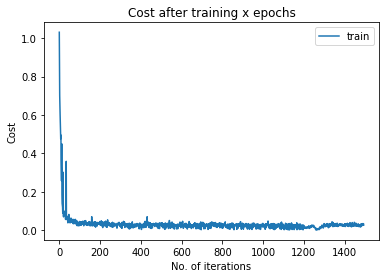

In [0]:
plt.title('Cost after training x epochs')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(train_loss_hist)

plt.legend(["train","val"],
            loc='best')
plt.show()

In [0]:
from allennlp.data.iterators import DataIterator
from tqdm import tqdm
from scipy.special import expit # the sigmoid function
from allennlp.nn import util as nn_util

def tonp(tsr): return tsr.detach().cpu().numpy()

class Predictor:
    def __init__(self, model: Model, iterator: DataIterator,
                 cuda_device: int=-1) -> None:
        self.model = model
        self.iterator = iterator
        self.cuda_device = cuda_device
        
    def _extract_data(self, batch) -> np.ndarray:
        out_dict = self.model(**batch)
        return expit(tonp(out_dict["logits"]))
    
    def predict(self, ds) -> np.ndarray:
        pred_generator = self.iterator(ds, num_epochs=1, shuffle=False)
        self.model.eval()
        pred_generator_tqdm = tqdm(pred_generator,
                                   total=self.iterator.get_num_batches(ds))
        preds = []
        with torch.no_grad():
            for batch in pred_generator_tqdm:
                batch = nn_util.move_to_device(batch, self.cuda_device)
                preds.append(self._extract_data(batch))
        return np.concatenate(preds, axis=0)

In [0]:
from allennlp.data.iterators import BasicIterator
# iterate over the dataset without changing its order
seq_iterator = BasicIterator(batch_size=64)
seq_iterator.index_with(vocab)

predictor = Predictor(model, seq_iterator, cuda_device=0)
#train_preds = predictor.predict(train_dataset) 
test_preds = predictor.predict(dev_dataset)

100%|██████████| 75/75 [00:21<00:00,  3.69it/s]


In [0]:
test_preds.shape

(4779, 690)

In [0]:
all_cats = []

for pred in (test_preds-.5)*2:
  cats= []
  for i,val in enumerate(pred):
    if val > .3:
      cats.append(i)
  all_cats.append(cats)

all_cats[0:5]

[[453, 592, 605, 606, 648],
 [9, 10, 66, 592, 604, 605, 608],
 [52, 53, 66, 144, 592, 604, 605, 608],
 [518, 529, 586, 592, 604, 605, 606, 609, 610, 611],
 [19, 25, 515, 529, 550, 557, 592, 604, 605, 609]]

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_preds_binary = (test_preds >= .3).astype(int)
f1_score(y_val, test_preds_binary, average="micro")

print(classification_report(y_val, test_preds_binary))

0.7202490556009037

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.58      0.69      0.63       238
           2       0.00      0.00      0.00        96
           3       0.53      0.54      0.54       123
           4       0.33      0.16      0.22       105
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         5
           7       1.00      0.20      0.33        15
           8       0.00      0.00      0.00        31
           9       0.91      0.71      0.80      1087
          10       0.96      0.60      0.74       500
          11       0.80      0.22      0.35        18
          12       0.00      0.00      0.00        68
          13       0.00      0.00      0.00        39
          14       0.00      0.00      0.00         2
          15       0.55      0.21      0.30       242
          16       0.65      0.10      0.18       214
          17       0.81    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
